# K近邻算法
* 思想极度简单
* 应用数学知识几乎为0
* 效果好
* 可解释机器学习算法使用过程中的很多细节问题
* 更完整的刻画机器学习应用的流程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
raw_data_X = [[3.39,2.33],
             [3.11,1.78],
             [1.34,3.36],
             [3.58,4.67],
             [2.28,2.86],
             [7.42,4.69],
             [5.74,3.53],
             [9.17,2.51],
             [7.79,3.42],
             [7.93,0.79]
             ]
raw_data_Y=[0,0,0,0,0,1,1,1,1,1]


In [39]:
X_tranin = np.array(raw_data_X)
Y_tranin = np.array(raw_data_Y)

In [40]:
X_tranin

array([[3.39, 2.33],
       [3.11, 1.78],
       [1.34, 3.36],
       [3.58, 4.67],
       [2.28, 2.86],
       [7.42, 4.69],
       [5.74, 3.53],
       [9.17, 2.51],
       [7.79, 3.42],
       [7.93, 0.79]])

In [41]:
Y_tranin

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

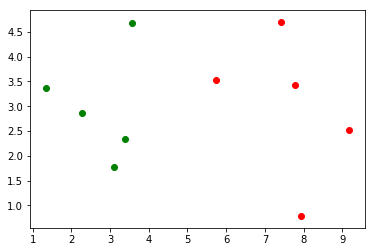

In [42]:
plt.scatter(X_tranin[Y_tranin==0,0],X_tranin[Y_tranin==0,1],color='g')
plt.scatter(X_tranin[Y_tranin==1,0],X_tranin[Y_tranin==1,1],color='r')

In [43]:
x = np.array([8.09,3.36])

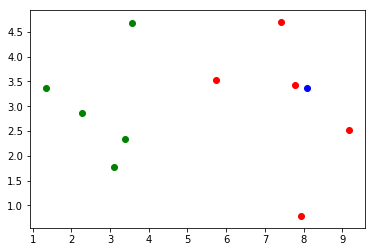

In [44]:
plt.scatter(X_tranin[Y_tranin==0,0],X_tranin[Y_tranin==0,1],color='g')
plt.scatter(X_tranin[Y_tranin==1,0],X_tranin[Y_tranin==1,1],color='r')
plt.scatter(x[0],x[1],color='b')

## KNN过程

In [45]:
from math import sqrt
distances = []
for x_train in X_tranin:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)
distances

[4.811538215581374,
 5.224633958470201,
 6.75,
 4.696402878799901,
 5.831474942070831,
 1.489227987918573,
 2.356140912594151,
 1.3743725841270265,
 0.30594117081556693,
 2.574975728040946]

In [46]:
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_tranin]

In [47]:
distances

[4.811538215581374,
 5.224633958470201,
 6.75,
 4.696402878799901,
 5.831474942070831,
 1.489227987918573,
 2.356140912594151,
 1.3743725841270265,
 0.30594117081556693,
 2.574975728040946]

In [48]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [49]:
nearest = np.argsort(distances)
k = 6
topK_y = [Y_tranin[i] for i in nearest[:k]]

In [50]:
topK_y

[1, 1, 1, 1, 1, 0]

In [51]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [52]:
votes = Counter(topK_y)x_predict

In [53]:
votes.most_common(1)

[(1, 5)]

In [55]:
votes.most_common(1)[0][0]

1

In [56]:
predict_y = votes.most_common(1)[0][0]

In [57]:
predict_y

1

In [58]:
%run KNN/KNN.py

In [59]:
predict_y = KNN_classify(6,X_tranin,Y_tranin,x)

In [60]:
predict_y

1

## 使用sklearn中的KNN算法
* 111
* 222

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [68]:
kNN_classifier.fit(X_tranin,Y_tranin)

(array([[3.39, 2.33],
        [3.11, 1.78],
        [1.34, 3.36],
        [3.58, 4.67],
        [2.28, 2.86],
        [7.42, 4.69],
        [5.74, 3.53],
        [9.17, 2.51],
        [7.79, 3.42],
        [7.93, 0.79]]), array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [69]:
x_predict = x.reshape(1,-1)

In [70]:
x_predict

array([[8.09, 3.36]])

In [71]:
kNN_classifier.predict(x_predict)

array([1])

In [72]:
y_predict = kNN_classifier.predict(x_predict)
y_predict[0]

1